# Visualizing Eye Tracking

### Environment Setup

In [34]:
from pynwb import NWBHDF5IO
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from dandi import dandiapi

### Downloading NWB Files
If you don't already have files to analyze, you can use data from The Allen Institute's `Visual Coding - Neuropixels` dataset. If you want to choose your own files to download, set `dandiset_id`, `dandi_stim_filepath`, `dandi_lfp_filepath` accordingly.

In [3]:
dandiset_id = "000253"
dandi_filepath = "sub-1169714184/sub-1169714184_ses-1180116198.nwb"
download_loc = "../../../data/glo"

In [4]:
filename = dandi_filepath.split("/")[-1]
my_dandiset = dandiapi.DandiAPIClient(token="7b74c449992670033c1c6018648afcac078527a9").get_dandiset(dandiset_id)
print(f"Got dandiset {my_dandiset}")

A newer version (0.46.6) of dandi/dandi-cli is available. You are using 0.46.3


Got dandiset DANDI:000253/draft


In [ ]:
file = my_dandiset.get_asset_by_path(dandi_filepath)
# this may take awhile, especially if the file to download is large
file.download(f"{download_loc}/{filename}")

print(f"Downloaded file to {download_loc}/{filename}")

### Extracting Eye Tracking Data

In [5]:
stim_filepath = f"{download_loc}/{filename}"

In [14]:
io = NWBHDF5IO(stim_filepath, mode="r", load_namespaces=True)
nwb = io.read() 

<class 'abc.EllipseSeries'>


In [25]:
eye_tracking = nwb.acquisition["EyeTracking"].eye_tracking
print(eye_tracking)

eye_tracking abc.EllipseSeries at 0x1920710006480
Fields:
  angle: <HDF5 dataset "angle": shape (478660,), type "<f8">
  area: <HDF5 dataset "area": shape (478660,), type "<f8">
  area_raw: <HDF5 dataset "area_raw": shape (478660,), type "<f8">
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (478660, 2), type "<f8">
  description: no description
  height: <HDF5 dataset "height": shape (478660,), type "<f8">
  interval: 1
  offset: 0.0
  reference_frame: nose
  resolution: -1.0
  timestamp_link: (
    pupil_tracking <class 'abc.EllipseSeries'>,
    corneal_reflection_tracking <class 'abc.EllipseSeries'>,
    likely_blink <class 'pynwb.base.TimeSeries'>
  )
  timestamps: <HDF5 dataset "timestamps": shape (478660,), type "<f8">
  timestamps_unit: seconds
  unit: meters
  width: <HDF5 dataset "width": shape (478660,), type "<f8">



In [101]:
### eye tracking includes
### height, width
### x, y (in data)
### angle, area
### timestamps

array([           nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan, 56069.80168977,
       55968.20442058, 55997.77446266, 55980.10901182, 55867.28374555,
       55951.4698356 , 55777.03379177, 55893.75553666, 55865.42733714,
       55954.00062664, 56141.19182018, 56293.6200757 , 56293.51129696,
       56385.83626749, 56299.53106319, 56297.90844755, 56296.23298497,
       56337.58350554, 56217.02570472, 56290.49521891, 56380.10075836,
       56262.75960635, 56233.24064677, 56161.44191812, 56219.21118531,
       56065.09805133, 56207.67233199, 56164.12500228, 56054.86282924,
       56374.86547935, 56199.71416455, 56412.0796514 , 56513.51999654,
       56496.15657783, 56580.33813366, 56585.98972883, 56477.21773904,
       56297.87799142, 56408.80339108, 56447.20337141, 56585.60222148,
      

In [90]:
start = 50
end = 100

(478660,)

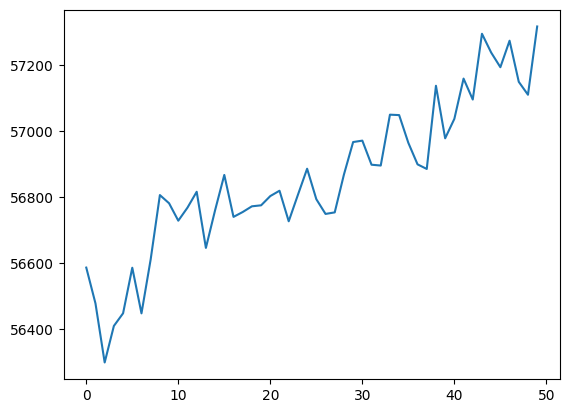

In [115]:
area = np.array(eye_tracking.area)
plt.plot(area[start:end])
area.shape

In [119]:
%matplotlib inline
xs = np.array([point[0] for point in eye_tracking.data])
ys = np.array([point[1] for point in eye_tracking.data])
print(xs.shape)
print(ys.shape)
print(type(area))
print(area.shape)

(478660,)
(478660,)
<class 'numpy.ndarray'>
(478660,)


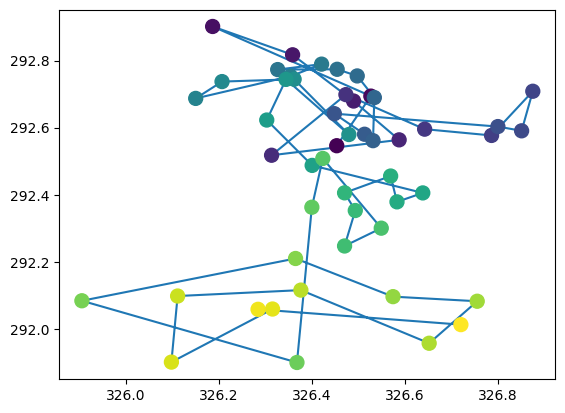

In [124]:
colors = plt.cm.viridis(np.linspace(0, 1, end-start))
plt.plot(xs[start:end], ys[start:end], zorder=0)
plt.scatter(xs[start:end], ys[start:end], s=100, c=colors, zorder=1)
plt.show()